<a href="https://colab.research.google.com/github/luwc/students/blob/master/20250402.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras import Sequential
from keras.layers import Input, Dense


In [ ]:
import os

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/My Drive/AA')


In [ ]:
os.listdir()

['iris.csv',
 'boston_housing.csv',
 'diabetes.csv',
 'train.csv',
 'eval.csv',
 '新北房屋資料+6指標.xlsx',
 'houseprice.csv',
 'houseprice1.csv',
 'NEWTAIPEICITY.keras']

In [ ]:
df=pd.read_csv('/content/drive/My Drive/AA/houseprice1.csv')
df.head()

,DATE,TP,AP,AREA,TYPE,AGE,BOOM,STOCK,UNEMP,EXCHANGE
0,101/08/13,190.0,4.7,40.08,1,22,15,7397.025879,4.4,29.988
1,101/08/17,220.0,7.5,29.47,1,31,15,7397.025879,4.4,29.988
2,101/08/20,285.0,8.7,32.94,1,19,15,7397.025879,4.4,29.988
3,101/08/27,200.0,10.5,19.09,3,15,15,7397.025879,4.4,29.988
4,101/08/28,460.0,21.2,21.69,6,31,15,7397.025879,4.4,29.988


In [ ]:
dataset=df.values
np.random.shuffle(dataset)

In [ ]:
y=dataset[:,3]
z=dataset[:,2]
x=dataset[:,4:10]

In [ ]:
mask=np.random.rand(len(df))<0.8
df_train=df[mask]
df_test=df[~mask]
print("Train:", df_train.shape)
print("Test:", df_test.shape)


Train: (21638, 10)
Test: (5440, 10)


In [ ]:
x_train=df_train.iloc[:, 4:10].values
y_train=df_train.iloc[:,2].values
x_test=df_test.iloc[:, 4:10].values
y_test=df_test.iloc[:,2].values

In [ ]:
x_train = x_train.astype(np.float64)
x_test = x_test.astype(np.float64)

In [ ]:
x_train -= x_train.mean(axis=0)
x_train /= x_train.std(axis=0)
x_test -= x_test.mean(axis=0)
x_test /= x_test.std(axis=0)


In [ ]:
def build_model():
  model=Sequential()
  model.add(Input(Shape=(x_train.shape[1],)))
  model.add(Dense(32,activation="relu"))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse', metrics=["mae", "root_mean_squared_error"])
  return model

In [ ]:
k=4
nb_val_samples=len(x_train)//k
num_epochs=80
mse_scores=[]
mae_scores=[]

In [ ]:
model=Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1, activation="linear"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=["mae", "root_mean_squared_error"])

In [ ]:
history=model.fit(x_train, y_train, epochs=200, batch_size=128, verbose=2, validation_split=0.2)

Epoch 1/200
136/136 - 1s - 10ms/step - loss: 791.6291 - mae: 22.2272 - root_mean_squared_error: 28.1359 - val_loss: 336.4425 - val_mae: 14.4193 - val_root_mean_squared_error: 18.3424
Epoch 2/200
136/136 - 0s - 2ms/step - loss: 220.3945 - mae: 11.3740 - root_mean_squared_error: 14.8457 - val_loss: 310.7132 - val_mae: 13.6579 - val_root_mean_squared_error: 17.6271
Epoch 3/200
136/136 - 0s - 2ms/step - loss: 209.0678 - mae: 11.0774 - root_mean_squared_error: 14.4592 - val_loss: 308.8904 - val_mae: 13.5930 - val_root_mean_squared_error: 17.5753
Epoch 4/200
136/136 - 0s - 2ms/step - loss: 205.5163 - mae: 10.9950 - root_mean_squared_error: 14.3358 - val_loss: 309.1950 - val_mae: 13.5687 - val_root_mean_squared_error: 17.5839
Epoch 5/200
136/136 - 0s - 2ms/step - loss: 203.3157 - mae: 10.9289 - root_mean_squared_error: 14.2589 - val_loss: 307.5929 - val_mae: 13.5320 - val_root_mean_squared_error: 17.5383
Epoch 6/200
136/136 - 0s - 2ms/step - loss: 201.2809 - mae: 10.8835 - root_mean_squared_e

In [ ]:
#loss, rmse=model.evaluate(x_test, y_test, verbose=0)
#loss, mae=model.evaluate(x_test, y_test, verbose=0)
#loss, mse=model.evaluate(x_test, y_test, verbose=0)
loss, mae, rmse=model.evaluate(x_train, y_train, verbose=0)
mse=rmse**2
mse_scores.append(mse)
mae_scores.append(mae)
print("=====訓練集結果======")
print("訓練資料集的 MAE  = ", np.mean(mae_scores))
print("訓練資料集的 MSE  = ", np.mean(mse_scores))

loss, mae, mse=model.evaluate(x_test, y_test, verbose=0)
mse_scores.append(mse)
mae_scores.append(mae)
print("======測試集結果========")
print("測試資料集的 MAE  = ", mae)
print("測試資料集的 MSE  = ", mse)




=====訓練集結果======
訓練資料集的 MAE  =  10.747583389282227
訓練資料集的 MSE  =  204.9461899247117
======測試集結果========
測試資料集的 MAE  =  10.84011173248291
測試資料集的 MSE  =  15.734444618225098


In [ ]:
print("Saving model to disk...")
model.save("NEWTAIPEICITY.keras")


Saving model to disk...


In [ ]:
price=model.predict(x_test, verbose=0)
print("真實價格:", y_test[70])
print("模型預測價格", price[0][0])


真實價格: 8.4
模型預測價格 9.2441025


<Axes: >

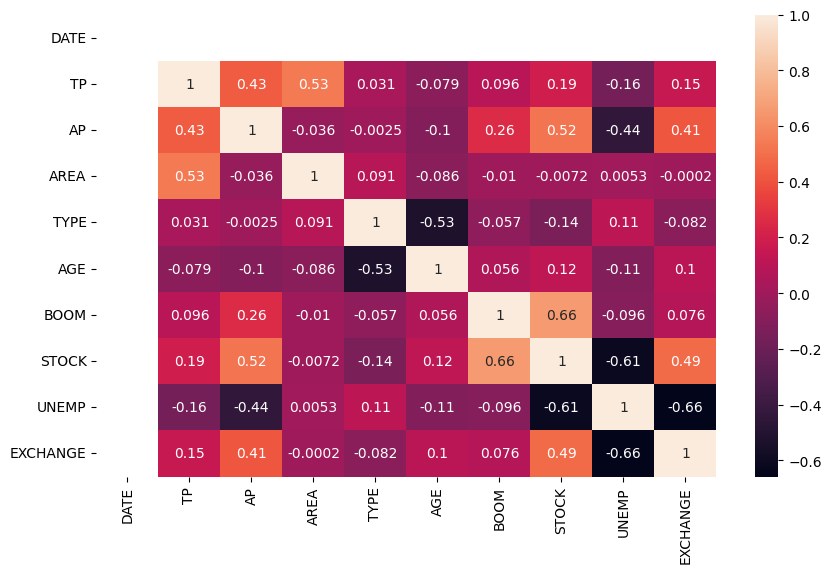

In [ ]:
# Linear regression model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Linear regression model START

# Convert the 'DATE' column to datetime objects
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)


In [ ]:
# linear regression

print("=================================")
model=LinearRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print( "regression coefficient")
print(model.coef_)
print("==================================")
print( "Linear regression model performance")
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred)}')
print(f'R2= {r2_score(y_test, y_pred)*100:.2f}')

print("==================================")

regression coefficient
[-0.45918851 -3.6627886  -0.42001873  7.62596801 -2.00014069  3.12133326]
Linear regression model performance
MSE: 265.8484694270669
RMSE: 265.8484694270669
R2= 31.99


In [ ]:
#模型存檔
import joblib
!pip install streamlit
import streamlit as st
joblib.dump(model, 'lr_model.joblib')
joblib.dump(x_train, 'lr_scaler.joblib')


['lr_scaler.joblib']

In [ ]:
model=joblib.load('lr_model.joblib')
scaler=joblib.load('lr_scaler.joblib')
list1=[0 for _ in range(10)]
st.title("Boston house price prediction")
col1, col2 = st.columns(2)
with col1:
  list1[0]=st.slider("面積:", value=40.0, min_value=0.1, max_value=5123.0)
  list1[1]=st.slider("房型:", value=2.0, min_value=1.0, max_value=6.0)
  list1[2]=st.slider("屋齡:", value=10.0, min_value=1.0, max_value=111.0)
with col2:
  list1[3]=st.slider("景氣指標:", value=26.0, min_value=1.0, max_value=45.0)
  list1[4]=st.slider("股價指數:", value=20000.0, min_value=7049.0, max_value=21840.0)
  list1[5]=st.slider("失業率:", value=3.1, min_value=1.0, max_value=6.0)
  list1[6]=st.slider("匯率:", value=30.3, min_value=26.0, max_value=33.0)
if st.button("預測"):
  x_new=[list1]
  x_new=scaler.transform(x_new)
  st.write(f'###預測房價:{model.predict(x_new)[0]:.2f}')



2025-04-02 03:55:38.912 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 03:55:38.912 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 03:55:38.913 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 03:55:38.914 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 03:55:38.915 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 03:55:38.916 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 03:55:38.917 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 03:55:38.918 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar